In [1]:
# author Alex J. Yang
import numpy as np
import pandas as pd
import itertools

In [2]:
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
df = pd.read_csv(r'Allpaper.csv.zip')

In [4]:
# calculate CI using bootstrap
def calculateCI(data,method,n):
    m=int(len(data)/10) #take 10% data
    ms=[]
    for j in range(n): #number of samples
        if method=='mean':
                ms.append(np.mean(np.random.choice(data,m)))
        if method=='median':
                ms.append(np.median(np.random.choice(data,m)))
    a,b=[np.percentile(ms,2.5),np.percentile(ms,97.5)]
    return a,b

In [5]:
def yearGroup(x):
    if x<1920:
        return '1900-1919'
    elif x<1940:
        return '1920-1939'
    elif x<1960:
        return '1940-1959'
    elif x<1980:
        return '1960-1979'
    else:
        return '1980-1999'
    
def delayGroup(x):
    if x<2:
        return x
    elif x<10:
        return '2-9'
    elif x<20:
        return '10-19'
    elif x<50:
        return '20-49'
    else:
        return '>50'
df['yearGroup'] = df['Year'].apply(yearGroup)
df['delayGroup'] = df['SB_T'].apply(delayGroup)

In [6]:
df1= df[(df['type_Concave'] == 0)&(df['type_Immediacy'] == 0)].copy()
df2 = df[df['type_Concave'] == 1].copy()
df3 = df[df['type_Immediacy'] == 1].copy()

In [7]:
def convert_column_to_percentile(df, column_name):
    ranks = df[column_name].rank()
    percentiles = (ranks - 1) / (len(df) - 1) * 100
    df[column_name + '_percentile'] = percentiles
convert_column_to_percentile(df1, 'SB_B')

In [8]:
def BpGroup(x):
    if x<5:
        return 5
    elif x<50:
        return 50
    elif x<95:
        return 95
    else:
        return 100
df1['SB_B_p'] = df1['SB_B_percentile'].apply(BpGroup)

In [9]:
df.columns

Index(['PaperID', 'Year', 'JournalID', 'SB_B', 'SB_T', 'type_Immediacy',
       'type_Concave', 'Citation_Count', 'C10', 'Reference_Count', 'C5',
       'Team_Size', 'Institution_Count', 'Disruption', 'Atyp_10pct_Z',
       'Atyp_Median_Z', 'Patent_Count', 'Newsfeed_Count', 'Tweet_Count',
       'FieldID', 'Fieldname', 'Hit_1pct', 'Hit_5pct', 'Hit_10pct', 'C_f',
       'yearGroup', 'delayGroup'],
      dtype='object')

# Scientific impact

In [10]:
dflst = [df , df1 , df2 , df3]

In [46]:
x = range(6)
typelst = [0,1,'2-9', '10-19', '20-49','>50']
colum = 'Citation_Count'
y = np.array([df[df['delayGroup']==x][colum].mean() for x in typelst])
CI = np.array([calculateCI( df[df['delayGroup']==x][colum].values , 'mean' , 100)[1] for x in typelst])
CI = CI-y

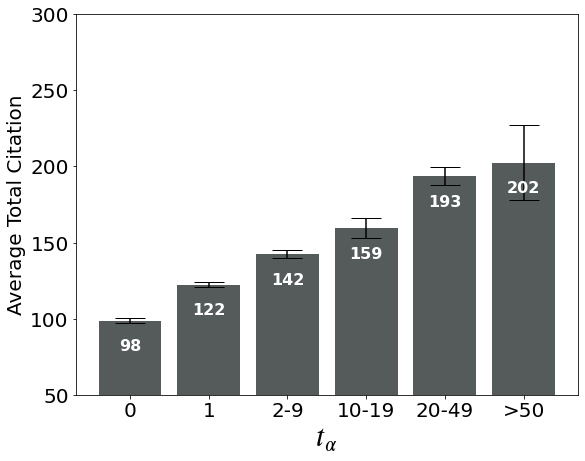

In [47]:
f, ax = plt.subplots(figsize=(9, 7))
plt.bar(x , y , yerr = CI , capsize = 15 ,color='#424949', alpha = .9)
plt.yticks(fontsize=20,)
plt.xticks(x,typelst,fontsize=20,)
plt.ylim(50,300)
plt.ylabel('Average Total Citation',fontsize = 20)
plt.xlabel(r'$𝑡_𝛼$',fontsize = 30)
for _ in range(len(y)):
    plt.text(x[_], y[_]-20 , str(int(float(y[_]))),fontsize = 16,c = 'white', ha='center', fontweight='bold')

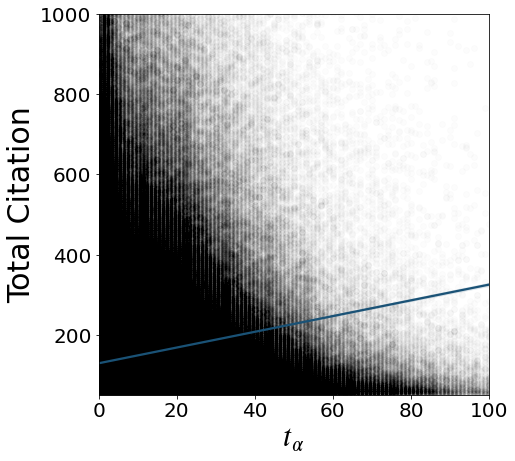

In [26]:
f, ax = plt.subplots(figsize=(7, 7))
plt.scatter(df['SB_T'], df['Citation_Count'], c = 'black', alpha = 0.01)
sns.regplot(data = df, y='Citation_Count' , x='SB_T',x_ci = 95 , n_boot = 100 ,seed = 0 , color = '#1A5276',scatter = False)
plt.ylim(50,10000)
plt.xlim(0,100)
plt.yticks(fontsize=20,)
plt.xticks(fontsize=20,)
plt.ylabel('Total Citation',fontsize = 30)
plt.xlabel(r'$𝑡_𝛼$',fontsize = 30)
plt.show()

In [26]:
x = range(6)
typelst = ['convex','immediacy','0-5','5-50','50-95','95-100']
CClst = [5,50,95,100]
colum = 'Citation_Count'
y1 = np.array([df1[df1['SB_B_p']==x][colum].mean() for x in CClst])
CI1 = np.array([calculateCI( df1[df1['SB_B_p']==x][colum].values , 'mean' , 100)[1] for x in CClst])
CI1 = CI1-y1

y2 =  np.array(df2[colum].mean())
y3 =  np.array(df3[colum].mean())
CI2 = np.array(calculateCI( df2[colum].values , 'mean' , 100)[1])
CI3 = np.array(calculateCI( df3[colum].values , 'mean' , 100)[1])
CI2 = CI2-y2
CI3 = CI3-y3

y =  np.append(np.array([y2,y3]),y1)
CI = np.append(np.array([CI2,CI3]),CI1)

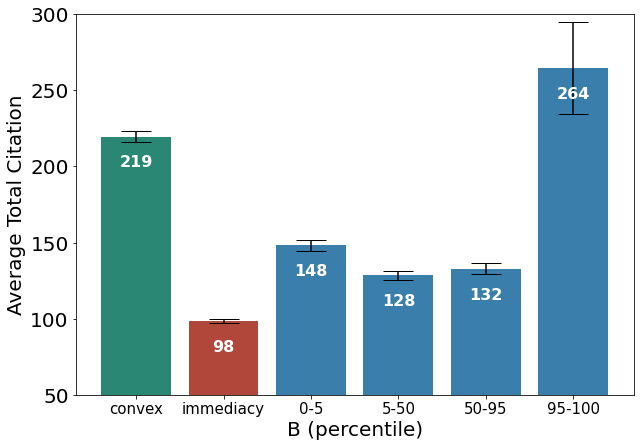

In [27]:
f, ax = plt.subplots(figsize=(10, 7))
plt.bar(x , y , yerr = CI , capsize = 15 ,color=['#117A65','#A93226']+['#2471A3']*4, alpha = .9)
plt.yticks(fontsize=20,)
plt.xticks(x,typelst,fontsize=15,)
plt.ylim(50,300)
plt.ylabel('Average Total Citation',fontsize = 20)
plt.xlabel('B (percentile)',fontsize = 20)
for _ in range(len(y)):
    plt.text(x[_], y[_]-20 , str(int(float(y[_]))),fontsize = 16,c = 'white', ha='center', fontweight='bold')

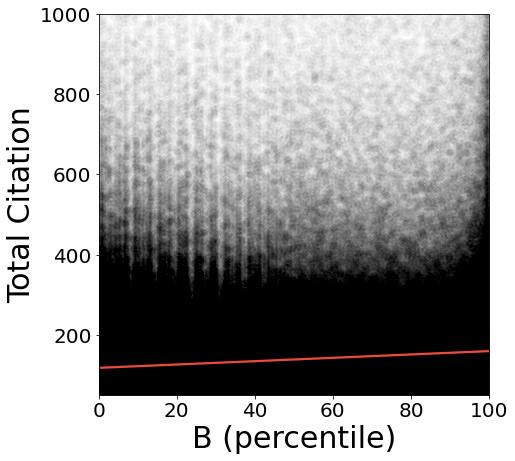

In [31]:
f, ax = plt.subplots(figsize=(7, 7))
plt.scatter(df1['SB_B_percentile'], df1['Citation_Count'], c = 'black', alpha = 0.01)
sns.regplot(data = df1, y='Citation_Count' , x='SB_B_percentile',x_ci = 95 , n_boot = 100 ,seed = 0 , color = '#E74C3C',scatter = False)
plt.ylim(50,1000)
plt.xlim(0,100)
plt.yticks(fontsize=20,)
plt.xticks(fontsize=20,)
plt.ylabel('Total Citation',fontsize = 30)
plt.xlabel('B (percentile)',fontsize = 30)
plt.show()

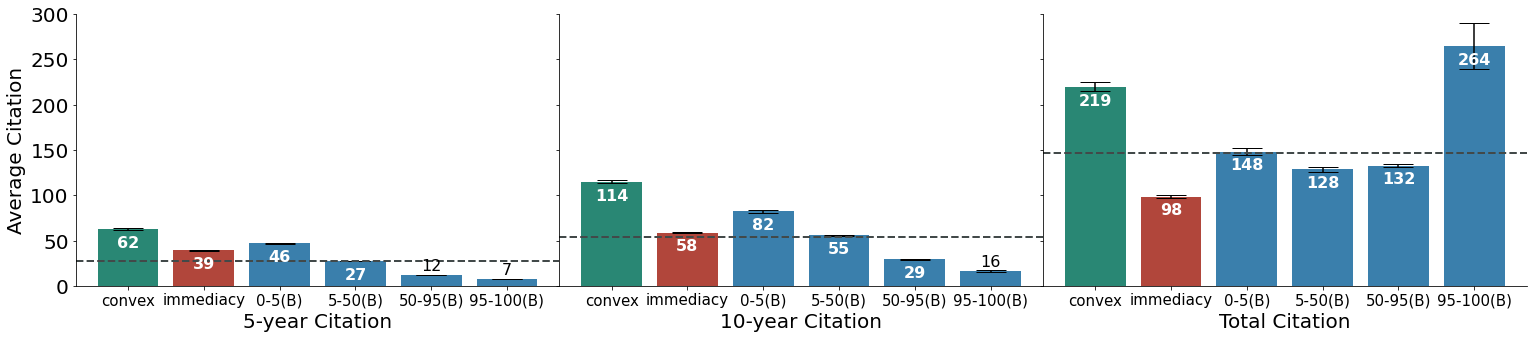

In [42]:
plt.subplots(1,3,figsize=(26,5) , sharey = True)
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0,hspace=0)
columlst = ['C5','C10','Citation_Count']
xlabellst = ['5-year Citation','10-year Citation','Total Citation']
for _ in range(3):
    ax = plt.subplot(1,3, _+1)
    x = range(6)
    typelst = ['convex','immediacy','0-5','5-50','50-95','95-100']
    CClst = [5,50,95,100]
    colum = columlst[_]
    y1 = np.array([df1[df1['SB_B_p']==x][colum].mean() for x in CClst])
    CI1 = np.array([calculateCI( df1[df1['SB_B_p']==x][colum].values , 'mean' , 100)[1] for x in CClst])
    CI1 = CI1-y1
    y2 =  np.array(df2[colum].mean())
    y3 =  np.array(df3[colum].mean())
    CI2 = np.array(calculateCI( df2[colum].values , 'mean' , 100)[1])
    CI3 = np.array(calculateCI( df3[colum].values , 'mean' , 100)[1])
    CI2 = CI2-y2
    CI3 = CI3-y3
    y =  np.append(np.array([y2,y3]),y1)
    CI = np.append(np.array([CI2,CI3]),CI1)
    
    Avg = df[colum].mean()
    
    plt.bar(x , y , yerr = CI ,color = ['#117A65','#A93226']+['#2471A3']*4,capsize = 15, alpha = .9)
    plt.ylim(0,300)
    plt.yticks(fontsize=20,)
    plt.xticks(x,['convex','immediacy','0-5(B)','5-50(B)','50-95(B)','95-100(B)'],fontsize=15,)
    plt.xlabel(xlabellst[_],fontsize = 20)
    
    plt.axhline(y = Avg , c = '#424949', linestyle = '--', linewidth = 2)
    
    if _==0:
        plt.ylabel('Average Citation',fontsize = 20)
    for _ in range(len(y)):
        if y[_]>20:
            plt.text(x[_], y[_]-20 , str(int(float(y[_]))),fontsize = 16,c = 'white', ha='center', fontweight='bold')
        else:
            plt.text(x[_], y[_]+5 , str(int(float(y[_]))),fontsize = 16,c = 'black', ha='center')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Commercial and Social Impact

In [11]:
x = range(6)
typelst = [0,1,'2-9', '10-19', '20-49','>50']
colum = 'Patent_Count'
y = np.array([df[df['delayGroup']==x][colum].mean() for x in typelst])
CI = np.array([calculateCI( df[df['delayGroup']==x][colum].values , 'mean' , 100)[1] for x in typelst])
CI = CI-y

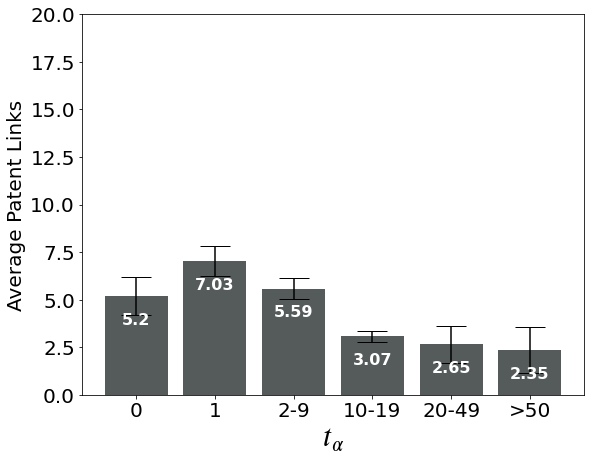

In [12]:
f, ax = plt.subplots(figsize=(9, 7))
plt.bar(x , y , yerr = CI , capsize = 15 ,color='#424949', alpha = .9)
plt.yticks(fontsize=20,)
plt.xticks(x,typelst,fontsize=20,)
plt.ylim(0,20)
plt.ylabel('Average Patent Links',fontsize = 20)
plt.xlabel(r'$𝑡_𝛼$',fontsize = 30)
for _ in range(len(y)):
    plt.text(x[_], y[_]-1.5 , str(y[_].round(2)),fontsize = 16,c = 'white', ha='center', fontweight='bold')

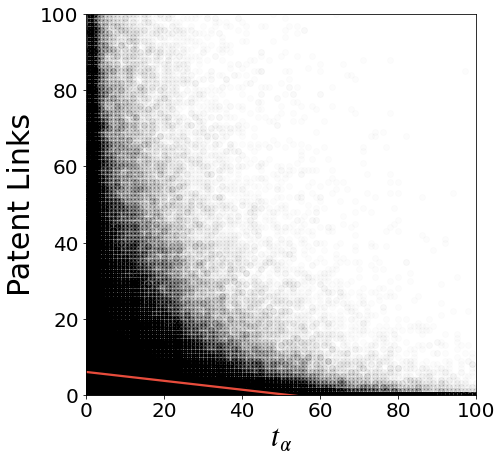

In [36]:
f, ax = plt.subplots(figsize=(7, 7))
plt.scatter(df['SB_T'], df['Patent_Count'], c = 'black', alpha = 0.01)
sns.regplot(data = df, y='Patent_Count' , x='SB_T',x_ci = 95 , n_boot = 100 ,seed = 0 , color = '#E74C3C',scatter = False)
plt.ylim(0,100)
plt.xlim(0,100)
plt.yticks(fontsize=20,)
plt.xticks(fontsize=20,)
plt.ylabel('Patent Links',fontsize = 30)
plt.xlabel(r'$𝑡_𝛼$',fontsize = 30)
plt.show()

In [21]:
x = range(6)
typelst = ['convex','immediacy','0-5','5-50','50-95','95-100']
CClst = [5,50,95,100]
colum = 'Patent_Count'
y1 = np.array([df1[df1['SB_B_p']==x][colum].mean() for x in CClst])
CI1 = np.array([calculateCI( df1[df1['SB_B_p']==x][colum].values , 'mean' , 100)[1] for x in CClst])
CI1 = CI1-y1

y2 =  np.array(df2[colum].mean())
y3 =  np.array(df3[colum].mean())
CI2 = np.array(calculateCI( df2[colum].values , 'mean' , 100)[1])
CI3 = np.array(calculateCI( df3[colum].values , 'mean' , 100)[1])
CI2 = CI2-y2
CI3 = CI3-y3

y =  np.append(np.array([y2,y3]),y1)
CI = np.append(np.array([CI2,CI3]),CI1)

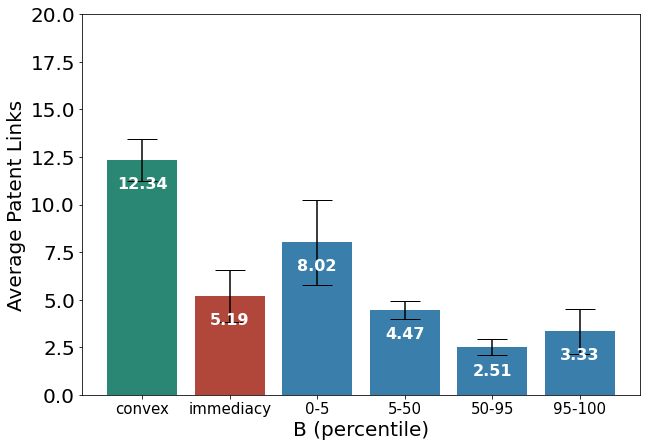

In [22]:
f, ax = plt.subplots(figsize=(10, 7))
plt.bar(x , y , yerr = CI , capsize = 15 ,color=['#117A65','#A93226']+['#2471A3']*4, alpha = .9)
plt.yticks(fontsize=20,)
plt.xticks(x,typelst,fontsize=15,)
plt.ylim(0,20)
plt.ylabel('Average Patent Links',fontsize = 20)
plt.xlabel('B (percentile)',fontsize = 20)
for _ in range(len(y)):
    plt.text(x[_], y[_]-1.5 , str(y[_].round(2)),fontsize = 16,c = 'white', ha='center', fontweight='bold')

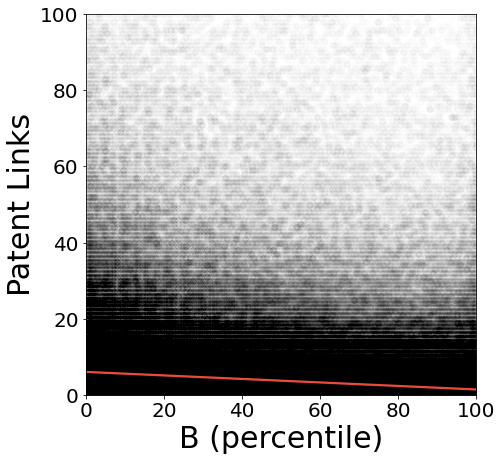

In [37]:
f, ax = plt.subplots(figsize=(7, 7))
plt.scatter(df1['SB_B_percentile'], df1['Patent_Count'], c = 'black', alpha = 0.01)
sns.regplot(data = df1, y='Patent_Count' , x='SB_B_percentile',x_ci = 95 , n_boot = 100 ,seed = 0 , color = '#E74C3C',scatter = False)
plt.ylim(0,100)
plt.xlim(0,100)
plt.yticks(fontsize=20,)
plt.xticks(fontsize=20,)
plt.ylabel('Patent Links',fontsize = 30)
plt.xlabel('B (percentile)',fontsize = 30)
plt.show()

In [33]:
x = range(6)
typelst = ['convex','immediacy','0-5','5-50','50-95','95-100']
CClst = [5,50,95,100]
colum = 'Patent_Count'
y1 = np.array([ len(df1.loc[(df1['SB_B_p']==x)&(df1[colum]!=0) , colum])/len(df1[df1['SB_B_p']==x]) for x in CClst])

y2 =  np.array(len(df2.loc[df2[colum]!=0 , colum])/len(df2))
y3 =  np.array(len(df3.loc[df3[colum]!=0 , colum])/len(df3))

y =  np.append(np.array([y2,y3]),y1)

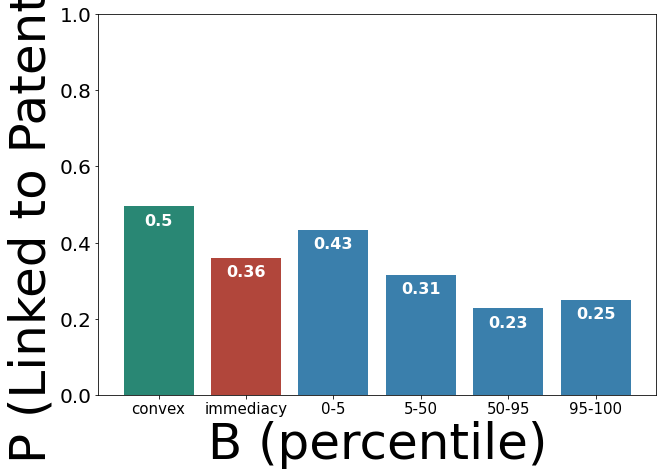

In [34]:
f, ax = plt.subplots(figsize=(10, 7))
plt.bar(x , y , capsize = 15 ,color=['#117A65','#A93226']+['#2471A3']*4, alpha = .9)
plt.yticks(fontsize=20,)
plt.xticks(x,typelst,fontsize=15,)
plt.ylim(0,1)
plt.ylabel('P (Linked to Patents)',fontsize = 50)
plt.xlabel('B (percentile)',fontsize = 50)
for _ in range(len(y)):
    plt.text(x[_], y[_]-0.05 , str(y[_].round(2)),fontsize = 16,c = 'white', ha='center', fontweight='bold')